In [1]:
#import libraries you will need
import os
import tweepy as tw
import pandas as pd
import json
import numpy as np      # For number computing
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob
import re

In [2]:
#Autenticación de claves
consumer_key="consumer_secret="access_token="access_token_secret="

In [3]:
#Autorización a usar las claves de acceso a mi tweeter
auth= tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
#obtener información de perfil de otro usuario
data=api.get_user("PrimeVideoLat")
print (json.dumps (data._json, indent=2))

{
  "id": 1193991063209304064,
  "id_str": "1193991063209304064",
  "name": "Amazon Prime Video Latinoam\u00e9rica",
  "screen_name": "PrimeVideoLat",
  "location": "Latinoam\u00e9rica",
  "profile_location": null,
  "description": "La p\u00e1gina oficial de Amazon Prime Video Latinoam\u00e9rica en Twitter.",
  "url": null,
  "entities": {
    "description": {
      "urls": []
    }
  },
  "protected": false,
  "followers_count": 119692,
  "friends_count": 9,
  "listed_count": 88,
  "created_at": "Mon Nov 11 20:37:15 +0000 2019",
  "favourites_count": 1079,
  "utc_offset": null,
  "time_zone": null,
  "geo_enabled": false,
  "verified": true,
  "statuses_count": 2437,
  "lang": null,
  "status": {
    "created_at": "Sun Jul 05 23:04:47 +0000 2020",
    "id": 1279914147774443520,
    "id_str": "1279914147774443520",
    "text": "@josejoiys https://t.co/1sXNSBZEh1",
    "truncated": false,
    "entities": {
      "hashtags": [],
      "symbols": [],
      "user_mentions": [
        {
   

In [6]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token,access_token_secret)

    # Return API with authentication:
    api = tw.API(auth)
    return api

In [8]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="PrimeVideoLat", count=500)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:500]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

@josejoiys https://t.co/1sXNSBZEh1

@OmarLeeOficial https://t.co/G3GALkYuUi

@CDarioRodriguez Drama: Little Fires Everywhere
Ciencia ficción: Tales from the Loop
Amor: Modern Love

@_salvapantallas https://t.co/j3x7GE08Ax

@SILVAELIAS_ ¿Quien es exactamente?

—¿Cuál es tu sueño?
—Poder dormir antes de las 12 después de iniciar un maratón de Star Wars. 
—Nadie lo ha logrado nunca. 🙄

@jjimmybass ¿la empezamos hoy?

@oleicymar Esa es la mejor respuesta. ❤️

@guadapavon_ @Deivid_pela 🤩

@AngelitoSvr https://t.co/QLHwQdONrV

@ay_Lola Creo que es sentimiento que a todos nos da con estrenos como este. 😎

@moisesdenis11 https://t.co/OvNCJqCIiX

@afalcon89 Es una buena opción para hacer maratón. 🤩

@Didakusalex Yo creo que más bien ya deberías tenerla. 😎

@gotechhost El sentimiento siempre será mutuo. 💕

@guadapavon_ @Deivid_pela ¿La vamos a empezar hoy?

@marianadaria 😊 vas hacer que me sonroje.

@Marcos_Adrian9 No es lo mejor leer el: "ya e

In [10]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(5))

,Tweets
0,@josejoiys https://t.co/1sXNSBZEh1
1,@OmarLeeOficial https://t.co/G3GALkYuUi
2,@CDarioRodriguez Drama: Little Fires Everywher...
3,@_salvapantallas https://t.co/j3x7GE08Ax
4,@SILVAELIAS_ ¿Quien es exactamente?


In [11]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [12]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1279914147774443520
2020-07-05 23:04:47
Twitter Web App
3
1
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'josejoiys', 'name': 'Jose Bascuñan', 'id': 55080173, 'id_str': '55080173', 'indices': [0, 10]}], 'urls': [], 'media': [{'id': 1279914136399482881, 'id_str': '1279914136399482881', 'indices': [11, 34], 'media_url': 'http://pbs.twimg.com/tweet_video_thumb/EcMrIDMXkAECqNB.jpg', 'media_url_https': 'https://pbs.twimg.com/tweet_video_thumb/EcMrIDMXkAECqNB.jpg', 'url': 'https://t.co/1sXNSBZEh1', 'display_url': 'pic.twitter.com/1sXNSBZEh1', 'expanded_url': 'https://twitter.com/PrimeVideoLat/status/1279914147774443520/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 454, 'h': 256, 'resize': 'fit'}, 'small': {'w': 454, 'h': 256, 'resize': 'fit'}, 'medium': {'w': 454, 'h': 256, 'resize': 'fit'}}}]}


In [13]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [14]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@josejoiys https://t.co/1sXNSBZEh1,34,1279914147774443520,2020-07-05 23:04:47,Twitter Web App,3,1
1,@OmarLeeOficial https://t.co/G3GALkYuUi,39,1279912966104760321,2020-07-05 23:00:05,Twitter Web App,1,0
2,@CDarioRodriguez Drama: Little Fires Everywher...,102,1279904492213821440,2020-07-05 22:26:25,Twitter Web App,1,1
3,@_salvapantallas https://t.co/j3x7GE08Ax,40,1279901382837927936,2020-07-05 22:14:03,Twitter Web App,1,0
4,@SILVAELIAS_ ¿Quien es exactamente?,35,1279898974263050242,2020-07-05 22:04:29,Twitter Web App,0,0
5,—¿Cuál es tu sueño?\n—Poder dormir antes de la...,124,1279883500724813829,2020-07-05 21:03:00,Twitter Web App,108,10
6,@jjimmybass ¿la empezamos hoy?,30,1279815094231281664,2020-07-05 16:31:10,Twitter Web App,1,0
7,@oleicymar Esa es la mejor respuesta. ❤️,40,1279814984437051399,2020-07-05 16:30:44,Twitter Web App,0,0
8,@guadapavon_ @Deivid_pela 🤩,27,1279811492464951296,2020-07-05 16:16:52,Twitter Web App,2,0
9,@AngelitoSvr https://t.co/QLHwQdONrV,36,1279811299355082753,2020-07-05 16:16:06,Twitter Web App,1,0


In [15]:
len(data)

200

In [16]:
data.to_excel("Amazon200.xls", index=False)

In [17]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 56.12


In [18]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Una tonelada de series y películas favoritas para todos los gustos. Eso son los estrenos de este mes. https://t.co/QbhwKFBKTG
Number of likes: 1347
125 characters.

The tweet with more retweets is: 
Una tonelada de series y películas favoritas para todos los gustos. Eso son los estrenos de este mes. https://t.co/QbhwKFBKTG
Number of retweets: 200
125 characters.



In [19]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web App
* Twitter Media Studio
* Twitter for iPhone
* Sprinklr


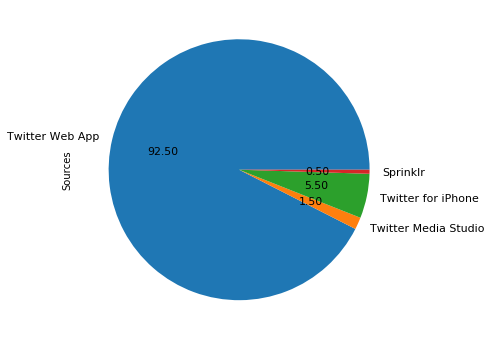

In [20]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [21]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [22]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@josejoiys https://t.co/1sXNSBZEh1,34,1279914147774443520,2020-07-05 23:04:47,Twitter Web App,3,1,0
1,@OmarLeeOficial https://t.co/G3GALkYuUi,39,1279912966104760321,2020-07-05 23:00:05,Twitter Web App,1,0,0
2,@CDarioRodriguez Drama: Little Fires Everywher...,102,1279904492213821440,2020-07-05 22:26:25,Twitter Web App,1,1,1
3,@_salvapantallas https://t.co/j3x7GE08Ax,40,1279901382837927936,2020-07-05 22:14:03,Twitter Web App,1,0,0
4,@SILVAELIAS_ ¿Quien es exactamente?,35,1279898974263050242,2020-07-05 22:04:29,Twitter Web App,0,0,0
5,—¿Cuál es tu sueño?\n—Poder dormir antes de la...,124,1279883500724813829,2020-07-05 21:03:00,Twitter Web App,108,10,0
6,@jjimmybass ¿la empezamos hoy?,30,1279815094231281664,2020-07-05 16:31:10,Twitter Web App,1,0,0
7,@oleicymar Esa es la mejor respuesta. ❤️,40,1279814984437051399,2020-07-05 16:30:44,Twitter Web App,0,0,0
8,@guadapavon_ @Deivid_pela 🤩,27,1279811492464951296,2020-07-05 16:16:52,Twitter Web App,2,0,0
9,@AngelitoSvr https://t.co/QLHwQdONrV,36,1279811299355082753,2020-07-05 16:16:06,Twitter Web App,1,0,0


ANALIZAMOS LOS RESULTADOS

In [23]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [24]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 5.0%
Percentage of neutral tweets: 93.0%
Percentage de negative tweets: 2.0%
